In [1]:
import pandas as pd
import numpy as np

In [2]:
# ============================================================================
# ГЛАВА 2.2: ПРЕДВАРИТЕЛЬНАЯ СТАТИСТИКА
# ============================================================================
df = pd.read_csv('Students_Social_Media_Addiction.csv')

print("2. АНАЛИЗ ЧИСЛОВЫХ ПЕРЕМЕННЫХ")

# Определение числовых столбцов
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"2.1 Числовые переменные ({len(numeric_cols)}):")
for i, col in enumerate(numeric_cols, 1):
    print(f"  {i:2d}. {col}")
print()

# 2.2 Детальная статистика для ключевых числовых переменных
print("2.2 Детальная статистика для ключевых числовых переменных:")

# Определяем ключевые числовые переменные для детального анализа
key_numeric_vars = [
    'Age',
    'Avg_Daily_Usage_Hours',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
    'Conflicts_Over_Social_Media',
    'Addicted_Score'
]

for var in key_numeric_vars:
    print(f"\nПеременная: {var}")
    print("-" * 30)

    stats = {
        'Среднее значение': df[var].mean(),
        'Медиана': df[var].median(),
        'Стандартное отклонение': df[var].std(),
        'Минимальное значение': df[var].min(),
        'Максимальное значение': df[var].max()
    }

    for stat_name, stat_value in stats.items():
        print(f"  {stat_name:35s}: {stat_value:10.4f}" if isinstance(stat_value, (int, float)) else
              f"  {stat_name:35s}: {stat_value:10}")

    # Проверка на выбросы по правилу 1.5*IQR
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]

    print(f"  Потенциальные выбросы (1.5*IQR)      : {len(outliers):10} ({len(outliers)/len(df)*100:.2f}%)")

print()

# ============================================================================
# 3. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ
# ============================================================================

print("3. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ")

# 3.1 Детальный анализ ключевых категориальных переменных
print("3.1 Детальный анализ ключевых категориальных переменных:")

key_categorical_vars = [
    'Gender',
    'Academic_Level',
    'Most_Used_Platform',
    'Affects_Academic_Performance',
    'Relationship_Status',
    'Country'
]

for var in key_categorical_vars:
    print(f"\nПеременная: {var}")

    value_counts = df[var].value_counts()
    percentages = df[var].value_counts(normalize=True) * 100

    stats_df = pd.DataFrame({
        'Количество': value_counts,
        'Процент (%)': percentages.round(2)
    })

    print(stats_df.head(10))  # Показываем топ-10 категорий

    if len(value_counts) > 10:
        print(f"\n  ... и еще {len(value_counts) - 10} категорий")


    # Для переменной Country показываем статистику по странам
    if var == 'Country':
        print(f"\n  Статистика по странам:")
        print(f"  Самая частая страна: {value_counts.index[0]} ({value_counts.iloc[0]} студента)")
        print(f"  Самая редкая страна: {value_counts.index[-1]} ({value_counts.iloc[-1]} студент)")

        # Сколько стран имеют более N студентов
        threshold = 5
        countries_above_threshold = (value_counts >= threshold).sum()
        print(f"  Стран с ≥{threshold} студентами: {countries_above_threshold}")

print()

2. АНАЛИЗ ЧИСЛОВЫХ ПЕРЕМЕННЫХ
2.1 Числовые переменные (7):
   1. Student_ID
   2. Age
   3. Avg_Daily_Usage_Hours
   4. Sleep_Hours_Per_Night
   5. Mental_Health_Score
   6. Conflicts_Over_Social_Media
   7. Addicted_Score

2.2 Детальная статистика для ключевых числовых переменных:

Переменная: Age
------------------------------
  Среднее значение                   :    20.6596
  Медиана                            :    21.0000
  Стандартное отклонение             :     1.3992
  Минимальное значение               :    18.0000
  Максимальное значение              :    24.0000
  Потенциальные выбросы (1.5*IQR)      :          0 (0.00%)

Переменная: Avg_Daily_Usage_Hours
------------------------------
  Среднее значение                   :     4.9187
  Медиана                            :     4.8000
  Стандартное отклонение             :     1.2574
  Минимальное значение               :     1.5000
  Максимальное значение              :     8.5000
  Потенциальные выбросы (1.5*IQR)      :   

In [3]:
print("1. ОСНОВНАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ")
print("-" * 60)
print(f"  Размер данных: {df.shape[0]} строк × {df.shape[1]} столбцов")
print()

#Структура данных
print("Структура данных:")
print(f"Всего строк (студентов): {len(df):,}")
print(f"Всего столбцов (признаков): {len(df.columns)}")
print()
#Типы данных
print("Типы данных в столбцах:")
print(df.dtypes.to_string())
print()

#Проверка на пропущенные значения
print("Анализ пропущенных значений:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Пропущено значений': missing_data,
    'Процент пропусков': missing_percent.round(2)
})

# Фильтруем только столбцы с пропусками
missing_df = missing_df[missing_df['Пропущено значений'] > 0]

if len(missing_df) > 0:
    print("Обнаружены пропущенные значения:")
    print(missing_df)
else:
    print("Пропущенных значений не обнаружено")
print()

#Проверка на дубликаты
print("Проверка на дубликаты:")
duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов строк: {duplicates}")
print()


1. ОСНОВНАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ
------------------------------------------------------------
  Размер данных: 705 строк × 13 столбцов

Структура данных:
Всего строк (студентов): 705
Всего столбцов (признаков): 13

Типы данных в столбцах:
Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64

Анализ пропущенных значений:
Пропущенных значений не обнаружено

Проверка на дубликаты:
Количество полных дубликатов строк: 0



In [4]:
def create_features(df):
    """Создает новые признаки для анализа и моделирования"""

    df = df.copy()

    # 1. Индекс цифрового благополучия
    df['digital_wellbeing_index'] = (
        0.4 * df['Avg_Daily_Usage_Hours'] / 10 +  # нормализуем к 0-1
        0.3 * df['Addicted_Score'] / 10 +
        0.2 * (10 - df['Mental_Health_Score']) / 10 +  # инвертируем
        0.1 * (12 - df['Sleep_Hours_Per_Night']) / 12   # инвертируем сон
    )

    # 2. Категории использования
    df['usage_category'] = pd.cut(df['Avg_Daily_Usage_Hours'],
                                  bins=[0, 3, 5, 8, 100],
                                  labels=['Low', 'Medium', 'High', 'Extreme'])

    # 3. Индикатор риска (простой)
    df['high_risk'] = ((df['Avg_Daily_Usage_Hours'] > 5) &
                       (df['Addicted_Score'] > 7)).astype(int)

    # 4. Взаимодействия
    df['usage_times_addiction'] = df['Avg_Daily_Usage_Hours'] * df['Addicted_Score']
    df['sleep_per_usage'] = df['Sleep_Hours_Per_Night'] / df['Avg_Daily_Usage_Hours']

    # 5. Группировка платформ по типу
    platform_types = {
        'Instagram': 'Visual',
        'TikTok': 'Visual',
        'Snapchat': 'Visual',
        'Facebook': 'Social',
        'Twitter': 'Social',
        'LinkedIn': 'Professional',
        'WhatsApp': 'Messaging',
        'LINE': 'Messaging',
        'KakaoTalk': 'Messaging'
    }
    df['platform_type'] = df['Most_Used_Platform'].map(platform_types).fillna('Other')

    # 6. Бинарные признаки
    df['low_sleep'] = (df['Sleep_Hours_Per_Night'] < 6).astype(int)
    df['high_addiction'] = (df['Addicted_Score'] > 7).astype(int)
    df['poor_mental_health'] = (df['Mental_Health_Score'] < 5).astype(int)

    # 7. Композитный риск
    df['composite_risk_score'] = (
        df['low_sleep'] + df['high_addiction'] + df['poor_mental_health']
    )

    return df

# Применяем функцию
df_with_features = create_features(df)

In [5]:
# ============================================================================
# 4. КЛЮЧЕВЫЕ МЕТРИКИ ИССЛЕДОВАНИЯ
# ============================================================================

print("4. КЛЮЧЕВЫЕ МЕТРИКИ ИССЛЕДОВАНИЯ")
print("-" * 60)

print("4.1 Основные метрики цифрового поведения:")
print("-" * 40)

metrics_summary = {
    'Общее количество студентов': len(df),
    'Среднее время использования соцсетей (часы/день)': df['Avg_Daily_Usage_Hours'].mean(),
    'Медианное время использования (часы/день)': df['Avg_Daily_Usage_Hours'].median(),
    'Стандартное отклонение времени использования': df['Avg_Daily_Usage_Hours'].std(),
    'Минимальное время использования': df['Avg_Daily_Usage_Hours'].min(),
    'Максимальное время использования': df['Avg_Daily_Usage_Hours'].max(),
    'Студентов с >4 часами использования в день': (df['Avg_Daily_Usage_Hours'] > 4).sum(),
    'Процент студентов с >4 часами использования': (df['Avg_Daily_Usage_Hours'] > 4).mean() * 100,
    'Средний балл зависимости (1-10)': df['Addicted_Score'].mean(),
    'Студентов с зависимостью >7 баллов': (df['Addicted_Score'] > 7).sum(),
    'Процент студентов с зависимостью >7 баллов': (df['Addicted_Score'] > 7).mean() * 100,
}

for metric_name, metric_value in metrics_summary.items():
    if isinstance(metric_value, (int, np.integer)):
        print(f"  {metric_name:50s}: {metric_value:>10,}")
    else:
        print(f"  {metric_name:50s}: {metric_value:>10.2f}")

print("\n4.2 Метрики здоровья и благополучия:")
print("-" * 40)

health_metrics = {
    'Среднее количество часов сна': df['Sleep_Hours_Per_Night'].mean(),
    'Студентов с <7 часами сна': (df['Sleep_Hours_Per_Night'] < 7).sum(),
    'Процент студентов с <7 часами сна': (df['Sleep_Hours_Per_Night'] < 7).mean() * 100,
    'Средний балл ментального здоровья (1-10)': df['Mental_Health_Score'].mean(),
    'Студентов с ментальным здоровьем <5 баллов': (df['Mental_Health_Score'] < 5).sum(),
    'Процент студентов с ментальным здоровьем <5 баллов': (df['Mental_Health_Score'] < 5).mean() * 100,
    'Среднее количество конфликтов из-за соцсетей': df['Conflicts_Over_Social_Media'].mean(),
    'Студентов с конфликтами ≥3': (df['Conflicts_Over_Social_Media'] >= 3).sum(),
}

for metric_name, metric_value in health_metrics.items():
    if isinstance(metric_value, (int, np.integer)):
        print(f"  {metric_name:50s}: {metric_value:>10,}")
    else:
        print(f"  {metric_name:50s}: {metric_value:>10.2f}")

print("\n4.3 Академические метрики:")
print("-" * 40)

academic_metrics = {
    'Студентов, у которых соцсети влияют на успеваемость (Yes)': (df['Affects_Academic_Performance'] == 'Yes').sum(),
    'Процент студентов с влиянием на успеваемость': (df['Affects_Academic_Performance'] == 'Yes').mean() * 100,
    'Студентов, у которых НЕ влияют на успеваемость (No)': (df['Affects_Academic_Performance'] == 'No').sum(),
    'Процент студентов без влияния на успеваемость': (df['Affects_Academic_Performance'] == 'No').mean() * 100,
}

for metric_name, metric_value in academic_metrics.items():
    print(f"  {metric_name:50s}: {metric_value:>10,}")

print("\n4.4 Демографические метрики:")
print("-" * 40)

demographic_metrics = {
    'Средний возраст студентов': df['Age'].mean(),
    'Минимальный возраст': df['Age'].min(),
    'Максимальный возраст': df['Age'].max(),
    'Количество женщин': (df['Gender'] == 'Female').sum(),
    'Количество мужчин': (df['Gender'] == 'Male').sum(),
    'Процент женщин': (df['Gender'] == 'Female').mean() * 100,
    'Процент мужчин': (df['Gender'] == 'Male').mean() * 100,
    'Количество студентов бакалавриата': (df['Academic_Level'] == 'Undergraduate').sum(),
    'Количество студентов магистратуры': (df['Academic_Level'] == 'Graduate').sum(),
    'Количество школьников': (df['Academic_Level'] == 'High School').sum(),
    'Уникальных стран в выборке': df['Country'].nunique(),
}

for metric_name, metric_value in demographic_metrics.items():
    if isinstance(metric_value, (int, np.integer)):
        print(f"  {metric_name:50s}: {metric_value:>10,}")
    else:
        print(f"  {metric_name:50s}: {metric_value:>10.2f}")

print()

4. КЛЮЧЕВЫЕ МЕТРИКИ ИССЛЕДОВАНИЯ
------------------------------------------------------------
4.1 Основные метрики цифрового поведения:
----------------------------------------
  Общее количество студентов                        :        705
  Среднее время использования соцсетей (часы/день)  :       4.92
  Медианное время использования (часы/день)         :       4.80
  Стандартное отклонение времени использования      :       1.26
  Минимальное время использования                   :       1.50
  Максимальное время использования                  :       8.50
  Студентов с >4 часами использования в день        :        536
  Процент студентов с >4 часами использования       :      76.03
  Средний балл зависимости (1-10)                   :       6.44
  Студентов с зависимостью >7 баллов                :        199
  Процент студентов с зависимостью >7 баллов        :      28.23

4.2 Метрики здоровья и благополучия:
----------------------------------------
  Среднее количество часов сн

In [6]:
def create_features(df):
    """
    Создание производных признаков для анализа цифрового образа жизни
    """

    df = df.copy()

    # 1. Индекс цифрового благополучия (интегральный показатель)
    df['digital_wellbeing_index'] = (
        0.4 * df['Avg_Daily_Usage_Hours'] / 10 +
        0.3 * df['Addicted_Score'] / 10 +
        0.2 * (10 - df['Mental_Health_Score']) / 10 +
        0.1 * (12 - df['Sleep_Hours_Per_Night']) / 12
    )

    # 2. Категории интенсивности использования соцсетей
    df['usage_category'] = pd.cut(
        df['Avg_Daily_Usage_Hours'],
        bins=[0, 3, 5, 8, 24],
        labels=['Low', 'Medium', 'High', 'Extreme']
    )

    # 3. Индикатор повышенного цифрового риска
    df['high_risk_user'] = (
        (df['Avg_Daily_Usage_Hours'] > 5) &
        (df['Addicted_Score'] > 7)
    ).astype(int)

    return df


# Применение функции
df = create_features(df)

In [7]:
df[['digital_wellbeing_index', 'usage_category', 'high_risk_user']].head()

,digital_wellbeing_index,usage_category,high_risk_user
0,0.573833,High,1
1,0.251500,Low,0
2,0.668333,High,1
3,0.341667,Low,0
4,0.520000,Medium,0


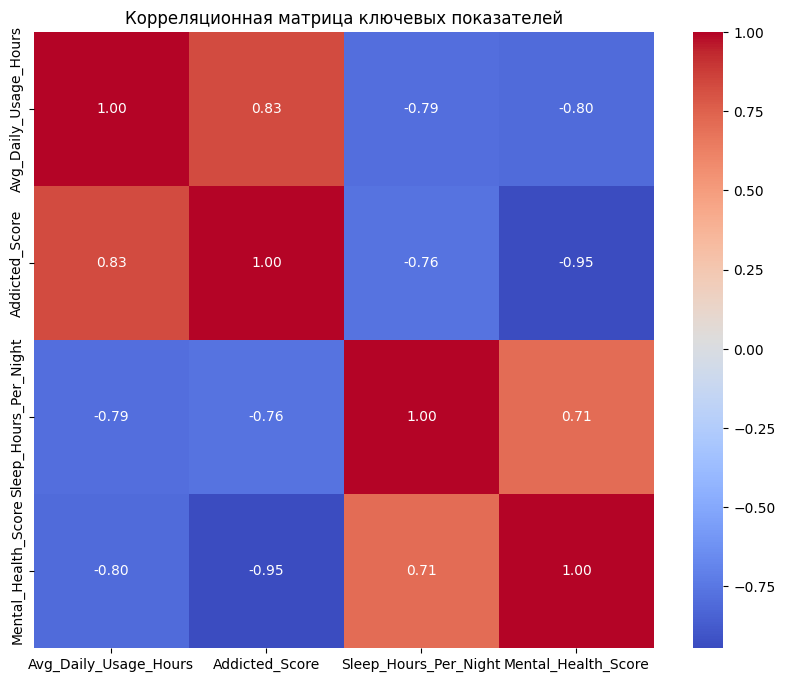

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_vars = [
    'Avg_Daily_Usage_Hours',
    'Addicted_Score',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score'
]

corr_matrix = df[numeric_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица ключевых показателей')
plt.show()

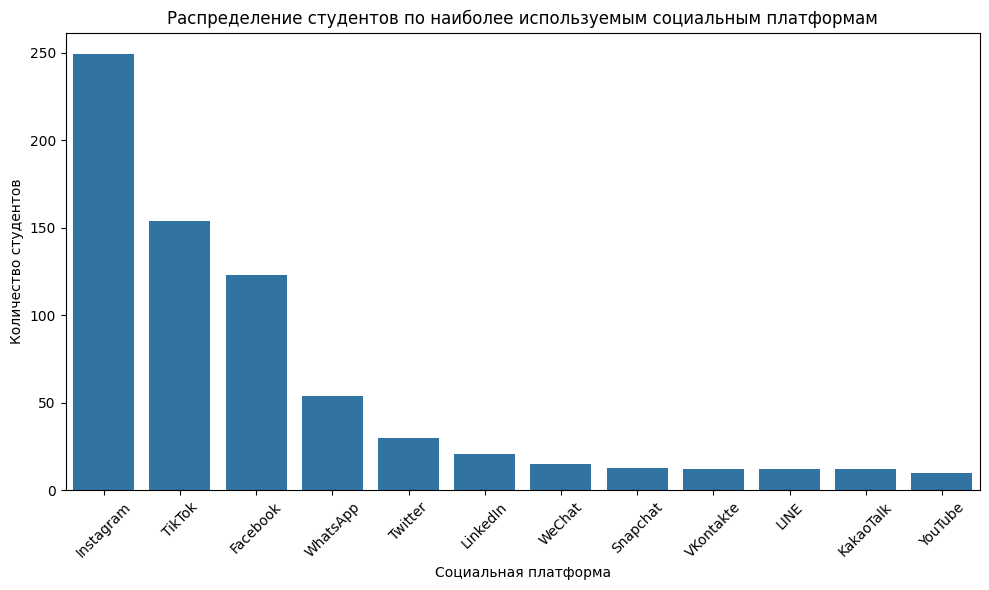

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

platform_counts = df['Most_Used_Platform'].value_counts()

sns.barplot(
    x=platform_counts.index,
    y=platform_counts.values
)

plt.title('Распределение студентов по наиболее используемым социальным платформам')
plt.xlabel('Социальная платформа')
plt.ylabel('Количество студентов')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('platform_distribution.png', dpi=300)
plt.show()

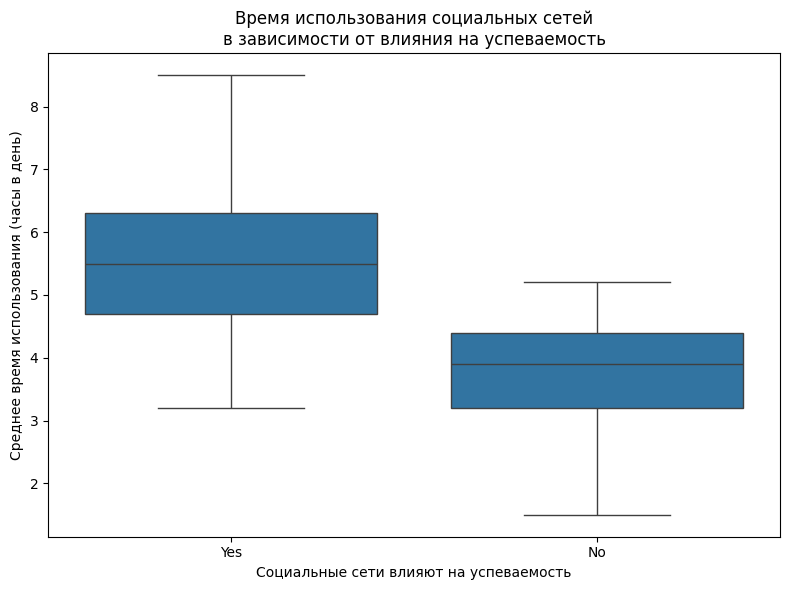

In [10]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    x='Affects_Academic_Performance',
    y='Avg_Daily_Usage_Hours',
    data=df
)

plt.title('Время использования социальных сетей\nв зависимости от влияния на успеваемость')
plt.xlabel('Социальные сети влияют на успеваемость')
plt.ylabel('Среднее время использования (часы в день)')

plt.tight_layout()
plt.savefig('academic_impact.png', dpi=300)
plt.show()

In [11]:
# Сравнительный анализ платформ по ключевым метрикам

# Выбор топ-5 платформ для анализа
top_platforms = ['Instagram', 'TikTok', 'Facebook', 'WhatsApp', 'Twitter']
platform_data = df[df['Most_Used_Platform'].isin(top_platforms)]

# Группировка и расчёт средних значений
platform_stats = platform_data.groupby('Most_Used_Platform').agg({
    'Avg_Daily_Usage_Hours': 'mean',
    'Addicted_Score': 'mean',
    'Mental_Health_Score': 'mean',
    'Sleep_Hours_Per_Night': 'mean'
}).round(2)

print("Сравнительная статистика по платформам:")
print(platform_stats)

Сравнительная статистика по платформам:
                    Avg_Daily_Usage_Hours  Addicted_Score  \
Most_Used_Platform                                          
Facebook                             4.51            5.67   
Instagram                            4.87            6.55   
TikTok                               5.35            7.43   
Twitter                              4.87            5.50   
WhatsApp                             6.48            7.46   

                    Mental_Health_Score  Sleep_Hours_Per_Night  
Most_Used_Platform                                              
Facebook                           6.72                   7.36  
Instagram                          6.12                   7.02  
TikTok                             5.71                   6.36  
Twitter                            6.83                   7.11  
WhatsApp                           5.54                   5.87  


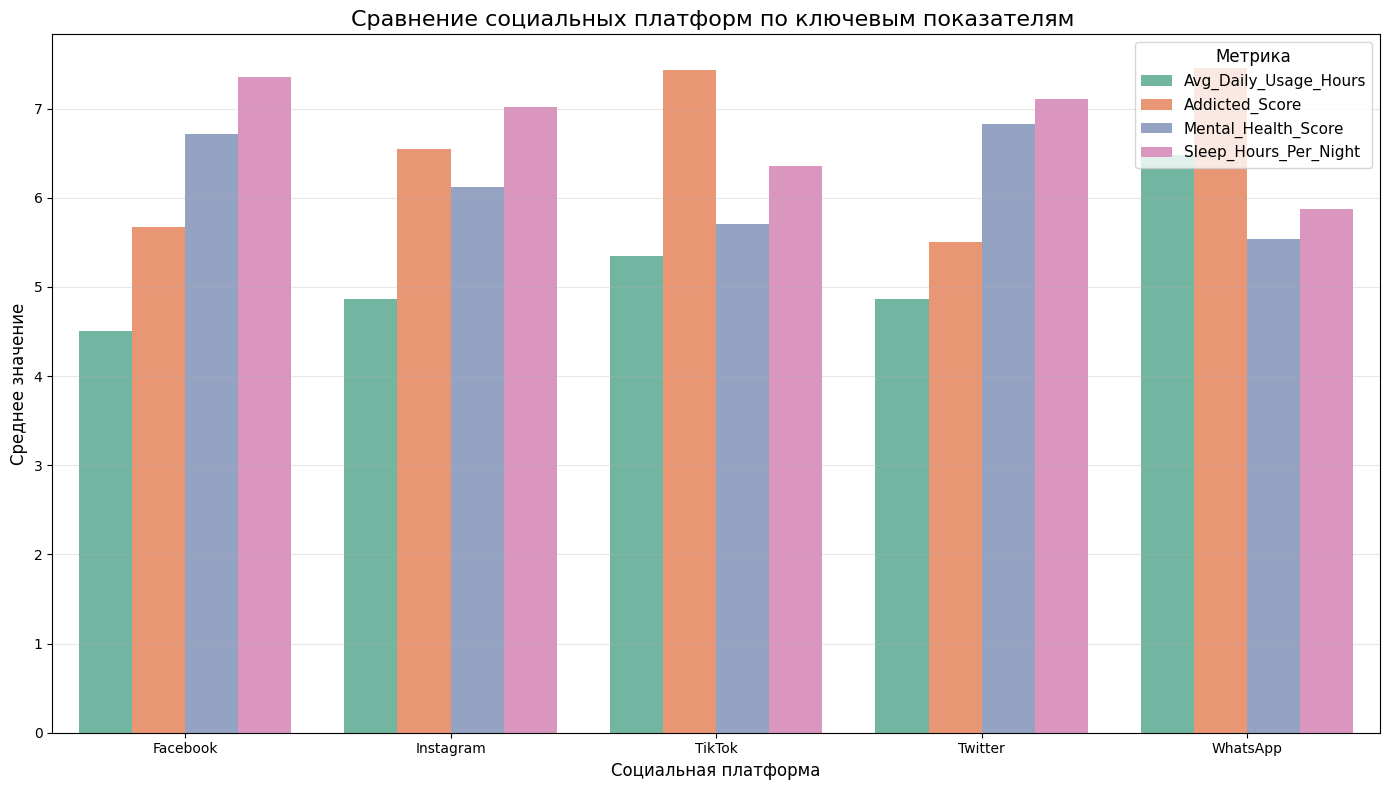

In [12]:
# Подготовка данных для визуализации
platform_stats_melted = platform_stats.reset_index().melt(
    id_vars='Most_Used_Platform',
    var_name='Метрика',
    value_name='Среднее значение'
)

# Построение групповой столбчатой диаграммы
plt.figure(figsize=(14, 8))
sns.barplot(
    data=platform_stats_melted,
    x='Most_Used_Platform',
    y='Среднее значение',
    hue='Метрика',
    palette='Set2'
)
plt.title('Сравнение социальных платформ по ключевым показателям ', fontsize=16)
plt.xlabel('Социальная платформа', fontsize=12)
plt.ylabel('Среднее значение', fontsize=12)
plt.legend(title='Метрика', title_fontsize=12, fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import scipy.stats as stats

# Загрузка данных
df = pd.read_csv('Students_Social_Media_Addiction.csv')

# Выбираем платформы
platforms = ['TikTok', 'WhatsApp', 'Instagram', 'Facebook']
df_filtered = df[df['Most_Used_Platform'].isin(platforms)]

metrics = ['Avg_Daily_Usage_Hours', 'Addicted_Score',
           'Mental_Health_Score', 'Sleep_Hours_Per_Night']

print("РЕЗУЛЬТАТЫ ANOVA ДЛЯ СРАВНЕНИЯ ПЛАТФОРМ")
print()

results = []

for metric in metrics:
    data_groups = []
    for platform in platforms:
        group_data = df_filtered[df_filtered['Most_Used_Platform'] == platform][metric]
        data_groups.append(group_data)

    # ANOVA
    f_stat, p_value = stats.f_oneway(*data_groups)

    # Определяем значимость
    significance = "ДА" if p_value < 0.05 else "НЕТ"

    results.append({
        'Показатель': metric,
        'F-статистика': round(f_stat, 3),
        'p-значение': round(p_value, 4),
        'Значимость': significance
    })


results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))
print()

print("ИНТЕРПРЕТАЦИЯ:")
for result in results:
    metric = result['Показатель']
    p_val = result['p-значение']

    if p_val < 0.05:
        print(f"• {metric}: Есть значимые различия между платформами (p={p_val})")

        # Показываем средние значения
        print("  Средние значения:")
        for platform in platforms:
            mean_val = df_filtered[df_filtered['Most_Used_Platform'] == platform][metric].mean()
            print(f"    {platform}: {mean_val:.2f}")
    else:
        print(f"• {metric}: Нет значимых различий между платформами (p={p_val})")

РЕЗУЛЬТАТЫ ANOVA ДЛЯ СРАВНЕНИЯ ПЛАТФОРМ

           Показатель  F-статистика  p-значение Значимость
Avg_Daily_Usage_Hours        44.682         0.0         ДА
       Addicted_Score        47.176         0.0         ДА
  Mental_Health_Score        28.634         0.0         ДА
Sleep_Hours_Per_Night        35.950         0.0         ДА

ИНТЕРПРЕТАЦИЯ:
• Avg_Daily_Usage_Hours: Есть значимые различия между платформами (p=0.0)
  Средние значения:
    TikTok: 5.35
    WhatsApp: 6.48
    Instagram: 4.87
    Facebook: 4.51
• Addicted_Score: Есть значимые различия между платформами (p=0.0)
  Средние значения:
    TikTok: 7.43
    WhatsApp: 7.46
    Instagram: 6.55
    Facebook: 5.67
• Mental_Health_Score: Есть значимые различия между платформами (p=0.0)
  Средние значения:
    TikTok: 5.71
    WhatsApp: 5.54
    Instagram: 6.12
    Facebook: 6.72
• Sleep_Hours_Per_Night: Есть значимые различия между платформами (p=0.0)
  Средние значения:
    TikTok: 6.36
    WhatsApp: 5.87
    Instagram: 7.02


Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00        50
         Yes       1.00      1.00      1.00        91

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


Важность признаков:
                        feature  importance
10  Conflicts_Over_Social_Media      0.3056
6                Addicted_Score      0.1921
11      digital_wellbeing_index      0.1690
8           Mental_Health_Score      0.1516
7         Sleep_Hours_Per_Night      0.0705
5         Avg_Daily_Usage_Hours      0.0645
12               usage_category      0.0160
4            Most_Used_Platform      0.0090
13               high_risk_user      0.0074
3                       Country      0.0070
9           Relationship_Status      0.0049
0                           Age      0.0010
1                        Gender      0.0

/tmp/ipython-input-1448981186.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances.head(12), x='importance', y='feature', palette='viridis')


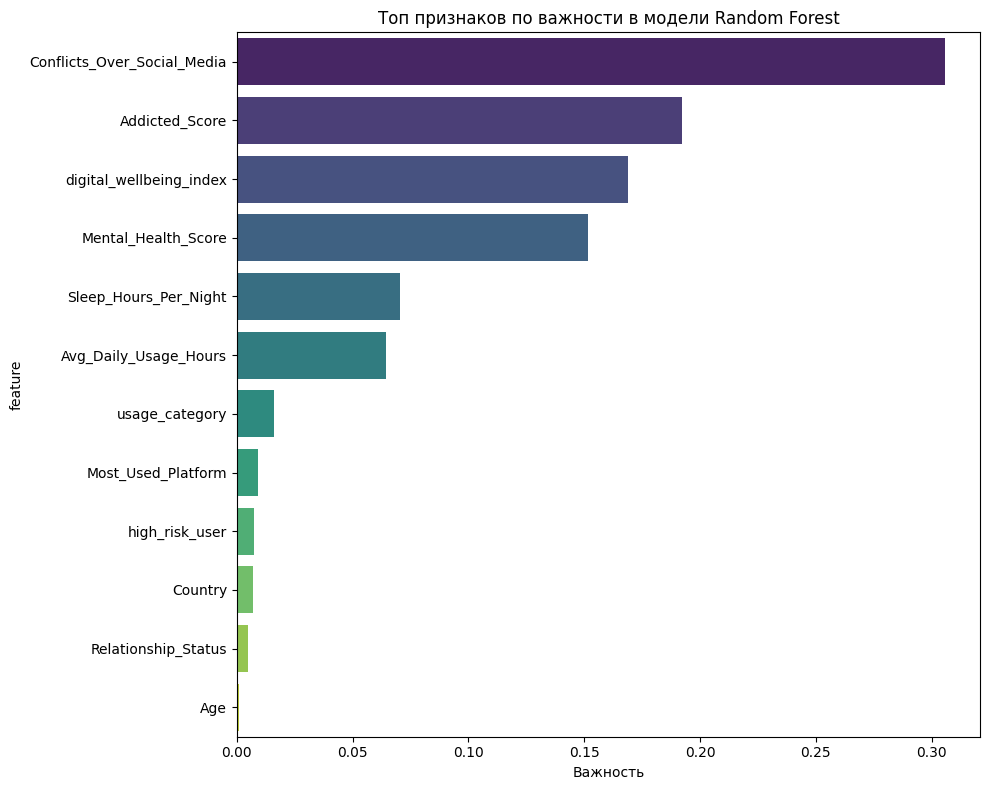

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


def create_features(df):
    """
    Создание производных признаков для анализа цифрового образа жизни
    """
    df = df.copy()

    # 1. Индекс цифрового благополучия (интегральный показатель)
    df['digital_wellbeing_index'] = (
        0.4 * df['Avg_Daily_Usage_Hours'] / 10 +
        0.3 * df['Addicted_Score'] / 10 +
        0.2 * (10 - df['Mental_Health_Score']) / 10 +
        0.1 * (12 - df['Sleep_Hours_Per_Night']) / 12
    )

    # 2. Категории интенсивности использования соцсетей
    df['usage_category'] = pd.cut(
        df['Avg_Daily_Usage_Hours'],
        bins=[0, 3, 5, 8, 24],
        labels=['Low', 'Medium', 'High', 'Extreme']
    )

    # 3. Индикатор повышенного цифрового риска
    df['high_risk_user'] = (
        (df['Avg_Daily_Usage_Hours'] > 5) &
        (df['Addicted_Score'] > 7)
    ).astype(int)

    return df

df = create_features(df)

# Целевая переменная: влияет ли использование соцсетей на академическую успеваемость
df['target'] = df['Affects_Academic_Performance'].map({'Yes': 1, 'No': 0})

# Полный список признаков
features = [
    'Age',
    'Gender',
    'Academic_Level',
    'Country',
    'Most_Used_Platform',
    'Avg_Daily_Usage_Hours',
    'Addicted_Score',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
    'Relationship_Status',
    'Conflicts_Over_Social_Media',
    'digital_wellbeing_index',
    'usage_category',
    'high_risk_user'
]

X = df[features].copy()
y = df['target']

# Кодирование категориальных переменных
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Обучение
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'  # Учитываем дисбаланс (64% Yes)
)

rf_model.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Важность признаков
importances = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).round(4)

print('\nВажность признаков:')
print(importances)

# Визуализация важности признаков
plt.figure(figsize=(10, 8))
sns.barplot(data=importances.head(12), x='importance', y='feature', palette='viridis')
plt.title('Топ признаков по важности в модели Random Forest')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

In [15]:
# === Проверка гипотез на основе модели ===

features_no_sleep = [f for f in features if f not in ['Sleep_Hours_Per_Night']]
X_no_sleep = X[features_no_sleep]

X_train_ns, X_test_ns, _, _ = train_test_split(X_no_sleep, y, test_size=0.2, random_state=42, stratify=y)
rf_no_sleep = RandomForestClassifier(
    n_estimators=200, random_state=42, class_weight='balanced'
)
rf_no_sleep.fit(X_train_ns, y_train)
imp_usage_with_sleep = importances[importances['feature'] == 'Avg_Daily_Usage_Hours']['importance'].values[0]
imp_usage_no_sleep = pd.Series(rf_no_sleep.feature_importances_, index=features_no_sleep)['Avg_Daily_Usage_Hours']

print(f'\nВажность Avg_Daily_Usage_Hours (с Sleep_Hours): {imp_usage_with_sleep:.4f}')
print(f'Важность Avg_Daily_Usage_Hours (без Sleep_Hours): {imp_usage_no_sleep:.4f}')

if imp_usage_no_sleep > imp_usage_with_sleep + 0.02:
    print("→ Важность времени использования выросла при удалении сна → сон частично медиирует влияние → гипотеза подтверждается")
else:
    print("→ Изменение незначительно → сон не является сильным медиатором")

# Дополнительно: точность модели без сна
y_pred_ns = rf_no_sleep.predict(X_test_ns)
print(f'\nAccuracy без Sleep_Hours_Per_Night: {accuracy_score(y_test, y_pred_ns):.3f}')


Важность Avg_Daily_Usage_Hours (с Sleep_Hours): 0.0645
Важность Avg_Daily_Usage_Hours (без Sleep_Hours): 0.0538
→ Изменение незначительно → сон не является сильным медиатором

Accuracy без Sleep_Hours_Per_Night: 1.000


Accuracy (без Conflicts): 1.000

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00        50
         Yes       1.00      1.00      1.00        91

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


5-fold CV Accuracy: 0.960 ± 0.037

Важность признаков (без Conflicts):
                    feature  importance
6            Addicted_Score      0.3134
8       Mental_Health_Score      0.2486
10  digital_wellbeing_index      0.2205
7     Sleep_Hours_Per_Night      0.0670
5     Avg_Daily_Usage_Hours      0.0619
11           usage_category      0.0231
4        Most_Used_Platform      0.0201
3                   Country      0.0192
12           high_risk_user      0.0099
9       Relationship_Status      0.0094
1                    Gender      0.0032
0                       Age      0.0030
2            Academic_Lev

/tmp/ipython-input-1257179125.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x='importance', y='feature', palette='viridis')


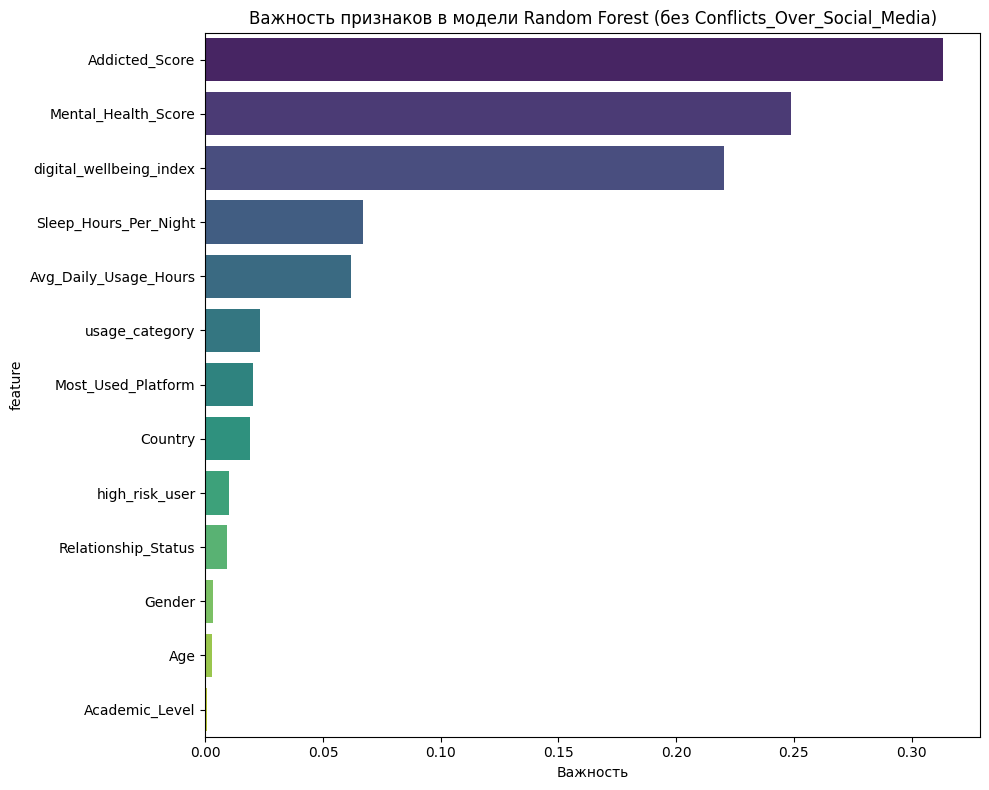

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # если используешь эти классы внутри

# Применяем создание признаков (как раньше)
df = create_features(df)

# Целевая переменная
df['target'] = df['Affects_Academic_Performance'].map({'Yes': 1, 'No': 0})

# Исключаем Conflicts_Over_Social_Media — основной источник переобучения
features_no_conflicts = [
    'Age',
    'Gender',
    'Academic_Level',
    'Country',
    'Most_Used_Platform',
    'Avg_Daily_Usage_Hours',
    'Addicted_Score',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
    'Relationship_Status',
    'digital_wellbeing_index',
    'usage_category',
    'high_risk_user'
]

X = df[features_no_conflicts].copy()
y = df['target']

# Кодирование категориальных
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le

# Разделение
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.pipeline import Pipeline


# Модель Random Forest
rf_model_no_conflicts = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'
)

rf_model_no_conflicts.fit(X_train, y_train)



# Предсказания
y_pred = rf_model_no_conflicts.predict(X_test)
y_pred_proba = rf_model_no_conflicts.predict_proba(X_test)[:, 1]

# Оценка
print(f'Accuracy (без Conflicts): {accuracy_score(y_test, y_pred):.3f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Кросс-валидация
cv_scores = cross_val_score(rf_model_no_conflicts, X, y, cv=5, scoring='accuracy')
print(f'\n5-fold CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}')

# Важность признаков
importances = pd.DataFrame({
    'feature': features_no_conflicts,
    'importance': rf_model_no_conflicts.feature_importances_
}).sort_values('importance', ascending=False).round(4)

print('\nВажность признаков (без Conflicts):')
print(importances)

# Визуализация
plt.figure(figsize=(10, 8))
sns.barplot(data=importances, x='importance', y='feature', palette='viridis')
plt.title('Важность признаков в модели Random Forest (без Conflicts_Over_Social_Media)')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

In [17]:
# === Проверка медиации сна (гипотеза 3) ===
features_no_sleep_no_conflicts = [f for f in features_no_conflicts if f != 'Sleep_Hours_Per_Night']
X_no_sleep = X[features_no_sleep_no_conflicts]

X_train_ns, X_test_ns, _, _ = train_test_split(X_no_sleep, y, test_size=0.2, random_state=42, stratify=y)

rf_no_sleep = RandomForestClassifier(
    n_estimators=300, random_state=42, class_weight='balanced'
)
rf_no_sleep.fit(X_train_ns, y_train)

imp_usage_with_sleep = importances[importances['feature'] == 'Avg_Daily_Usage_Hours']['importance'].values[0]
imp_usage_no_sleep = pd.Series(rf_no_sleep.feature_importances_, index=features_no_sleep_no_conflicts)['Avg_Daily_Usage_Hours']

print(f'\nВажность Avg_Daily_Usage_Hours (с сном): {imp_usage_with_sleep:.4f}')
print(f'Важность Avg_Daily_Usage_Hours (без сна): {imp_usage_no_sleep:.4f}')

if imp_usage_no_sleep > imp_usage_with_sleep + 0.015:
    print("→ Сон является медиатором: при удалении сна важность времени использования значительно выросла → гипотеза 3 подтверждается")
else:
    print("→ Медиация слабая")


Важность Avg_Daily_Usage_Hours (с сном): 0.0619
Важность Avg_Daily_Usage_Hours (без сна): 0.0912
→ Сон является медиатором: при удалении сна важность времени использования значительно выросла → гипотеза 3 подтверждается


In [21]:
print(df)


     Student_ID  Age  Gender Academic_Level     Country  \
0             1   19  Female  Undergraduate  Bangladesh   
1             2   22    Male       Graduate       India   
2             3   20  Female  Undergraduate         USA   
3             4   18    Male    High School          UK   
4             5   21    Male       Graduate      Canada   
..          ...  ...     ...            ...         ...   
700         701   20  Female  Undergraduate       Italy   
701         702   23    Male       Graduate      Russia   
702         703   21  Female  Undergraduate       China   
703         704   24    Male       Graduate       Japan   
704         705   19  Female  Undergraduate      Poland   

     Avg_Daily_Usage_Hours Most_Used_Platform Affects_Academic_Performance  \
0                      5.2          Instagram                          Yes   
1                      2.1            Twitter                           No   
2                      6.0             TikTok            